# converting table 2 into a figure

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/PartialNephrectomy_Python"))
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/RenalAllograft_Python"))

#sys.path.append('../')
from ML_UsefulFunctions import *
from KidneyROIAnalyses import *
from RenalAllograftFunctions import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from scipy.stats import f_oneway


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")

pl.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})

/Users/miraliu/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


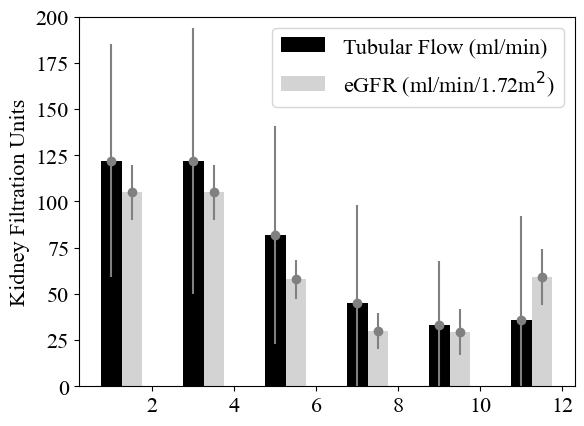

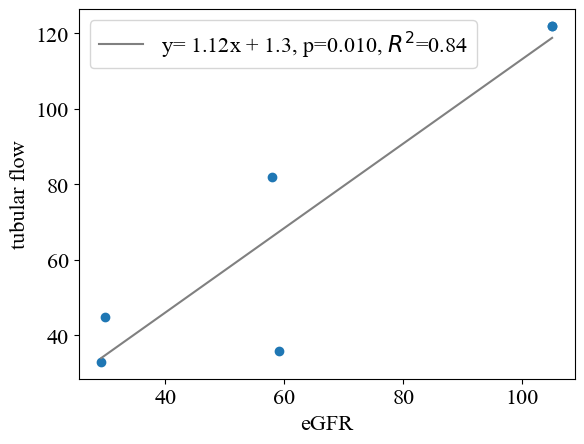

combined volunteer kidneys


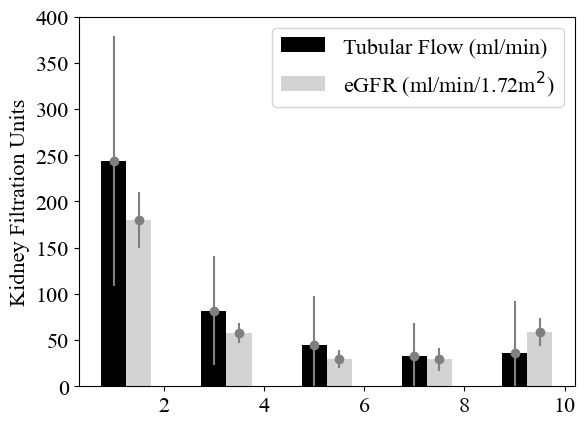

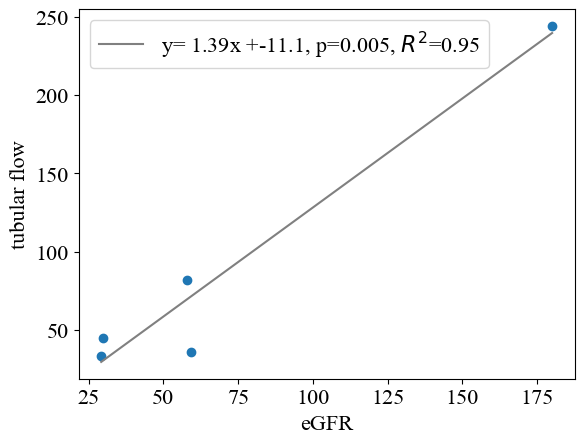

In [2]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'Sheet1') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9,11], df["Mean tubular flow in ml/min"], width = 0.5, label = 'Tubular Flow (ml/min)',color = 'Black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5,12-.5], df["Mean eGFR ml/min/1.72m2"], width = 0.5, label = 'eGFR (ml/min/1.72m$^2$)', color = 'lightgray')
#pl.bar([1-.5,3-.5,5-.5,7-.5,9-.5,11-.5], df["Mean vascular flow in ml/min"]/10, width = 0.5)



pl.errorbar([1,3,5,7,9,11], df["Mean tubular flow in ml/min"],df["std tubular flow in ml/min"],fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5,12-.5], df["Mean eGFR ml/min/1.72m2"],df["stdev eGFR ml/min/1.72m2"],fmt="o", color = 'grey')
#pl.errorbar([1-.5,3-.5,5-.5,7-.5,9-.5,11-.5], df["Mean vascular flow in ml/min"]/10, df["std vascular flow in ml/min"]/10, fmt="o", color = 'grey')

#pl.xticks(rotation=90)
#pl.hlines(90,0,6)
pl.ylim(0,200)
#pl.xlim(0,12.5)
pl.legend()
pl.ylabel('Kidney Filtration Units')
pl.show()

 
x = df["Mean eGFR ml/min/1.72m2"]
y=df["Mean tubular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('eGFR')
pl.ylabel('tubular flow')
pl.show()


print('combined volunteer kidneys')
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'TotalKidney') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9], df["Mean tubular flow in ml/min"], width = 0.5, label = 'Tubular Flow (ml/min)',color = 'Black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean eGFR ml/min/1.72m2"], width = 0.5, label = 'eGFR (ml/min/1.72m$^2$)', color = 'lightgray')
#pl.bar([1-.5,3-.5,5-.5,7-.5,9-.5,11-.5], df["Mean vascular flow in ml/min"]/10, width = 0.5)



pl.errorbar([1,3,5,7,9], df["Mean tubular flow in ml/min"],df["std tubular flow in ml/min"],fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean eGFR ml/min/1.72m2"],df["stdev eGFR ml/min/1.72m2"],fmt="o", color = 'grey')
#pl.errorbar([1-.5,3-.5,5-.5,7-.5,9-.5,11-.5], df["Mean vascular flow in ml/min"]/10, df["std vascular flow in ml/min"]/10, fmt="o", color = 'grey')

#pl.xticks(rotation=90)
#pl.hlines(90,0,6)
pl.ylim(0,400)
#pl.xlim(0,12.5)
pl.legend()
pl.ylabel('Kidney Filtration Units')
pl.show()

 
x = df["Mean eGFR ml/min/1.72m2"]
y=df["Mean tubular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('eGFR')
pl.ylabel('tubular flow')
pl.show()

# Proteinuria with 80 for healthy, split kidneys

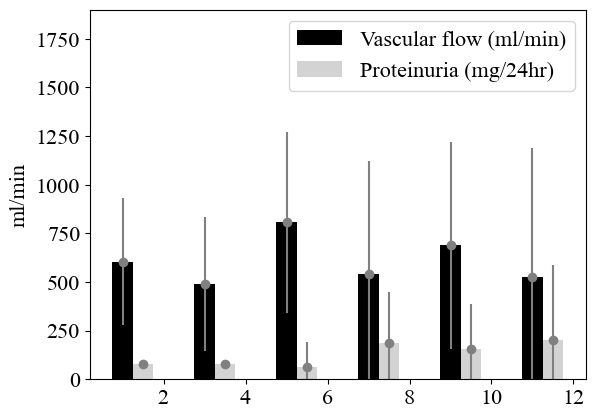

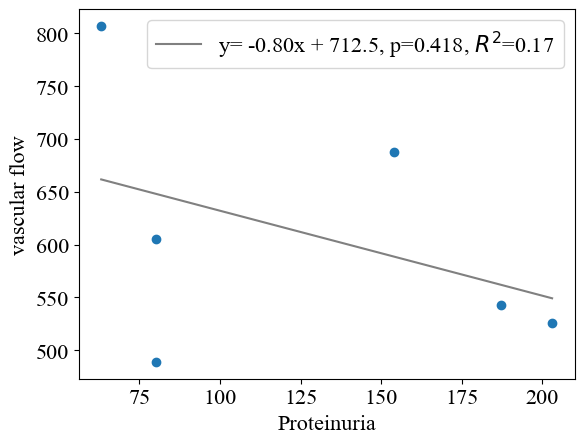

In [3]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'AdjProtein') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9, 11], df["Mean vascular flow in ml/min"], width = 0.5, label = 'Vascular flow (ml/min)', color = 'black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5, 12-0.5], df["Mean Proteinuria in mg/24hr"], width = 0.5, label = 'Proteinuria (mg/24hr)', color = 'lightgray')



pl.errorbar([1,3,5,7,9,11], df["Mean vascular flow in ml/min"], df["std vascular flow in ml/min"], fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5, 12-0.5], df["Mean Proteinuria in mg/24hr"],df["stdev Proteinuria in mg/24hr"],fmt="o", color = 'grey')

pl.ylim(0,1900)
#pl.xticks(rotation=90)
pl.legend()
pl.ylabel('ml/min')
pl.show()


x=df["Mean Proteinuria in mg/24hr"]
y=df["Mean vascular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('Proteinuria')
pl.ylabel('vascular flow')
pl.show()

# proteinuria combined kidneys

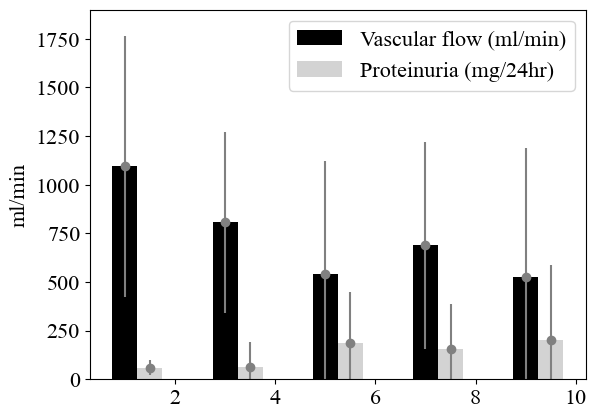

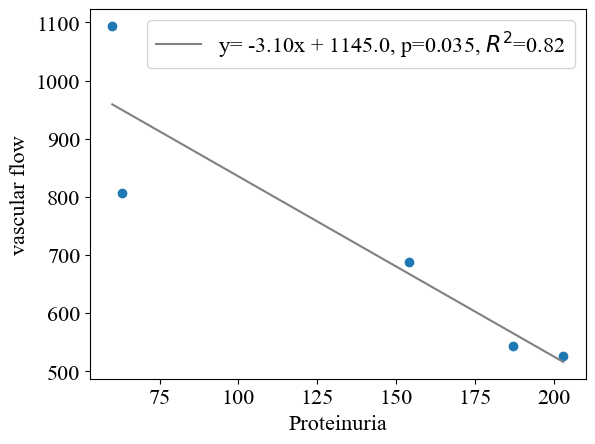

In [4]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'TotalKidney') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9], df["Mean vascular flow in ml/min"], width = 0.5, label = 'Vascular flow (ml/min)', color = 'black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean Proteinuria in mg/24hr"], width = 0.5, label = 'Proteinuria (mg/24hr)', color = 'lightgray')



pl.errorbar([1,3,5,7,9], df["Mean vascular flow in ml/min"], df["std vascular flow in ml/min"], fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean Proteinuria in mg/24hr"],df["stdev Proteinuria in mg/24hr"],fmt="o", color = 'grey')

pl.ylim(0,1900)
#pl.xticks(rotation=90)
pl.legend()
pl.ylabel('ml/min')
pl.show()


x=df["Mean Proteinuria in mg/24hr"]
y=df["Mean vascular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('Proteinuria')
pl.ylabel('vascular flow')
pl.show()

# scatter plot with healthy dropped

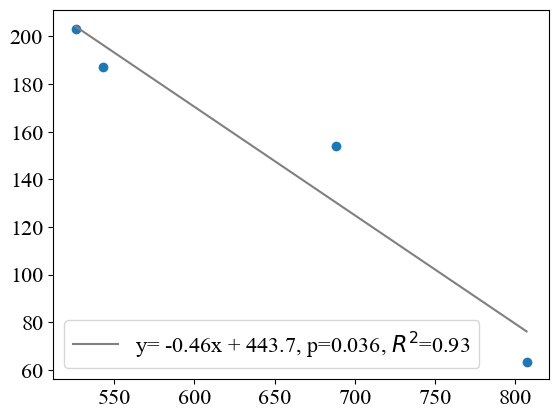

In [5]:
df2 = df.drop(0)
x=df2["Mean vascular flow in ml/min"]
y=df2["Mean Proteinuria in mg/24hr"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# tubular vs proteinuria?

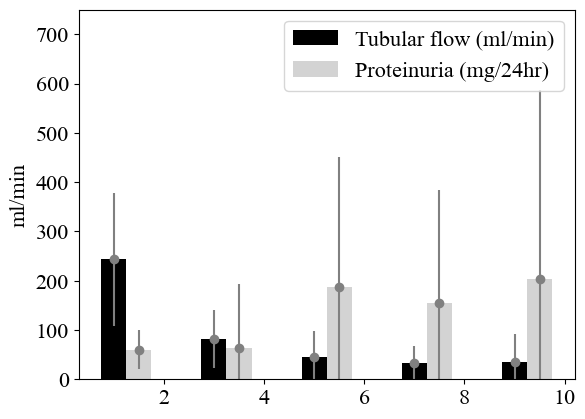

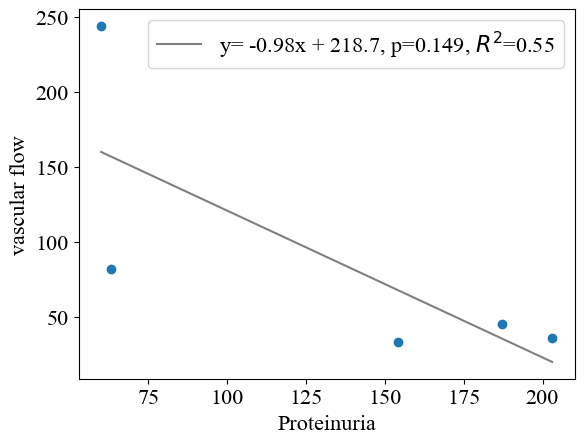

In [15]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'TotalKidney') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9], df["Mean tubular flow in ml/min"], width = 0.5, label = 'Tubular flow (ml/min)', color = 'black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean Proteinuria in mg/24hr"], width = 0.5, label = 'Proteinuria (mg/24hr)', color = 'lightgray')



pl.errorbar([1,3,5,7,9], df["Mean tubular flow in ml/min"], df["std tubular flow in ml/min"], fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean Proteinuria in mg/24hr"],df["stdev Proteinuria in mg/24hr"],fmt="o", color = 'grey')

pl.ylim(0,750)
#pl.xticks(rotation=90)
pl.legend()
pl.ylabel('ml/min')
pl.show()


x=df["Mean Proteinuria in mg/24hr"]
y=df["Mean tubular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('Proteinuria')
pl.ylabel('vascular flow')
pl.show()

# vascular vs eGFR

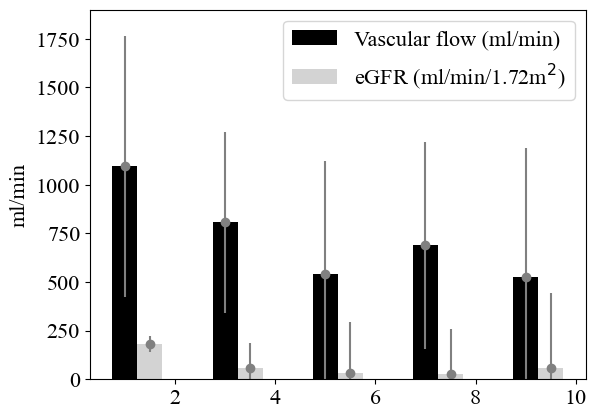

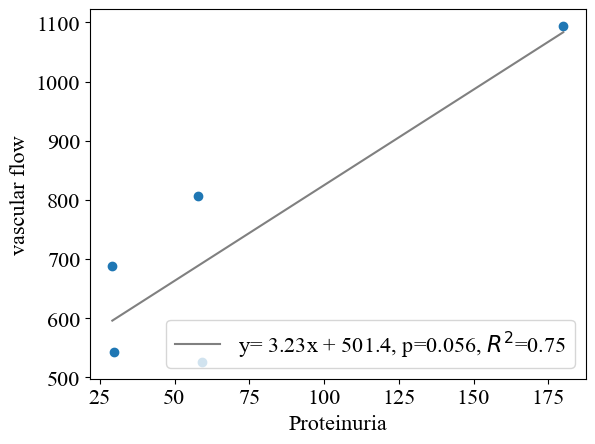

In [20]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/FlowVals.xlsx'
df = pd.read_excel(fileloc,sheet_name = 'TotalKidney') ## take2 or not here


#sns.barplot(Multiexp_Data, x="Kidney Group", y = "Mean vascular flow in ml/min ", alpha=0.2)
pl.bar([1,3,5,7,9], df["Mean vascular flow in ml/min"], width = 0.5, label = 'Vascular flow (ml/min)', color = 'black')
pl.bar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean eGFR ml/min/1.72m2"], width = 0.5, label = 'eGFR (ml/min/1.72m$^2$)', color = 'lightgray')



pl.errorbar([1,3,5,7,9], df["Mean vascular flow in ml/min"], df["std vascular flow in ml/min"], fmt="o", color = 'grey')
pl.errorbar([2-.5,4-.5,6-.5,8-.5,10-.5], df["Mean eGFR ml/min/1.72m2"],df["stdev Proteinuria in mg/24hr"],fmt="o", color = 'grey')

pl.ylim(0,1900)
#pl.xticks(rotation=90)
pl.legend()
pl.ylabel('ml/min')
pl.show()


x=df["Mean eGFR ml/min/1.72m2"]
y=df["Mean vascular flow in ml/min"]
pl.scatter(x,y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
r_value2 = r_value**2
x1 = np.linspace(min(x), max(x))
pl.plot(x1,func(x1,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, p={p_value:.3f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.xlabel('Proteinuria')
pl.ylabel('vascular flow')
pl.show()